<a href="https://colab.research.google.com/github/mees/calvin/blob/main/RL_with_CALVIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Reinforcement Learning with CALVIN</h1>

The **CALVIN** simulated benchmark is perfectly suited for training agents with reinforcement learning, in this notebook we will demonstrate how to integrate your agents to these environments.

## Installation
The first step is to install the CALVIN github repository such that we have access to the packages

In [ ]:
#Mount the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
####Env Setting
#You may run this only once
%cd /content/drive/MyDrive/calvinoffon
!git clone https://github.com/mees/calvin_env.git
%cd /content/drive/MyDrive/calvinoffon/calvin_env
!git clone https://github.com/lukashermann/tacto.git

/content/drive/MyDrive/calvinoffon
fatal: destination path 'calvin_env' already exists and is not an empty directory.
/content/drive/MyDrive/calvinoffon/calvin_env
fatal: destination path 'tacto' already exists and is not an empty directory.


In [ ]:
# Install packages
%cd /content/drive/MyDrive/calvinoffon/calvin_env/tacto/
!pip3 install -e .
%cd /content/drive/MyDrive/calvinoffon/calvin_env
!pip3 install -e .
!pip3 install -U numpy

/content/drive/MyDrive/calvinoffon/calvin_env/tacto
Obtaining file:///content/drive/MyDrive/calvinoffon/calvin_env/tacto
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/mmatl/pyopengl.git (to revision 76d1261adee2d3fd99b418e75b0416bb7d2865e6) to /tmp/pip-install-zvpxgooe/pyopengl_4bcf2fe3213240bf9420c1d9f97e9746
  Running command git clone --filter=blob:none --quiet https://github.com/mmatl/pyopengl.git /tmp/pip-install-zvpxgooe/pyopengl_4bcf2fe3213240bf9420c1d9f97e9746
  Running command git rev-parse -q --verify 'sha^76d1261adee2d3fd99b418e75b0416bb7d2865e6'
  Running command git fetch -q https://github.com/mmatl/pyopengl.git 76d1261adee2d3fd99b418e75b0416bb7d2865e6
  Resolved https://github.com/mmatl/pyopengl.git to commit 76d1261adee2d3fd99b418e75b0416bb7d2865e6
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.7 MB/s eta 0:00:0

/content/drive/MyDrive/calvinoffon/calvin_env
Obtaining file:///content/drive/MyDrive/calvinoffon/calvin_env
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.8/195.8 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.9 MB/s eta 0:00:00
  Building editable for calvin_env (pyproject.toml) ... done
  Created wheel for calvin_env: filename=calvin_env-0.0.1-0.editable-py3-none-any.whl size=3599 sha256=2ac6245c18d210217fc84014c04a16f702d314830f9bf787a0c3e0c5cb61f10d
  Stored in directory: /tmp/pip-ephem-wheel-cache-owda3ebv/wheels/99/86/68/3c578893db74f985649cc8358079b3de15b7ef148845a4b926
Successfully built calvin_env
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/1

In [ ]:
# Run this to check if the installation was succesful
%cd /content/drive/MyDrive/calvinoffon/calvin_env
from calvin_env.envs.play_table_env import PlayTableSimEnv
# 안되면 런타임 세션 다시시작 후, 이 셀부터 다시 실행

/content/drive/MyDrive/calvinoffon/calvin_env


/content/drive/MyDrive/calvinoffon/calvin_env/calvin_env/envs/play_table_env.py:289: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path="../../conf", config_name="config_data_collection")


## Loading the environment
After the installation has finished successfully, we can start using the environment for reinforcement Learning.
To be able to use the environment we need to have the appropriate configuration that define the desired features, for this example, we will load the static and gripper camera.

In [ ]:
%cd /content/drive/MyDrive/calvinoffon
from hydra import initialize, compose

with initialize(config_path="./calvin_env/conf/"):
  cfg = compose(config_name="config_data_collection.yaml", overrides=["cameras=static_and_gripper"])
  cfg.env["use_egl"] = False
  cfg.env["show_gui"] = False
  cfg.env["use_vr"] = False
  cfg.env["use_scene_info"] = True
  print(cfg.env)

/content/drive/MyDrive/calvinoffon


<ipython-input-2-73f67effeb19>:4: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with initialize(config_path="./calvin_env/conf/"):
/usr/local/lib/python3.10/dist-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'config_data_collection.yaml': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/hydra/core/default_element.py:124: UserWarning: In 'vr_input/vr_controller/vive': Usage of deprecated keyword in package header '# @package _group_'.
See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/changes_to_package_header for more information
  deprecation_warning(


{'_target_': 'calvin_env.envs.play_table_env.PlayTableSimEnv', '_recursive_': False, 'cameras': '${cameras}', 'seed': 0, 'bullet_time_step': 240.0, 'use_vr': False, 'show_gui': False, 'robot_cfg': '${robot}', 'scene_cfg': '${scene}', 'use_scene_info': True, 'use_egl': False, 'control_freq': 30}


The environment has similar structure to traditional OpenAI Gym environments.

*   We can restart the simulation with the *reset* function.
*   We can perform an action in the environment with the *step* function.
*   We can visualize images taken from the cameras in the environment by using the *render* function.





In [ ]:
import time
import hydra
import numpy as np
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from IPython import display

##Lets see the data configuration

env = hydra.utils.instantiate(cfg.env)
observation = env.reset()
for i in range(1):
  # The action consists in a pose displacement (position and orientation)
  action_displacement = np.random.uniform(low=-1, high=1, size=6)
  # And a binary gripper action, -1 for closing and 1 for oppening
  action_gripper = np.random.choice([-1, 1], size=1)
  action = np.concatenate((action_displacement, action_gripper), axis=-1)
  observation, reward, done, info = env.step(action)
  #The observation is given as a dictionary with different values
  for i in observation.keys():
    print(f'Observation Keys : {i}')
    if isinstance(observation[i],dict):
      for j in observation[i].keys():
        print(f'-----{i} Keys : {j}-----')
        print(observation[i][j].shape)
    else:
      print(f'----------------')
      print(observation[i].shape)

  #The action space
  """
  ['actions'] (dtype=np.float32, shape=(7,))
    tcp position (3): x,y,z in absolute world coordinates
    tcp orientation (3): euler angles x,y,z in absolute world coordinates
    gripper_action (1): binary (close = -1, open = 1)

  ['rel_actions'] (dtype=np.float32, shape=(7,))
    tcp position (3): x,y,z in relative world coordinates normalized and clipped to (-1, 1) with scaling factor 50
    tcp orientation (3): euler angles x,y,z in relative world coordinates normalized and clipped to (-1, 1) with scaling factor 20
    gripper_action (1): binary (close = -1, open = 1)
  """
  rgb = env.render(mode="rgb_array")[:,:,::-1]
  #display.clear_output(wait=True)
  #display.display(plt.gcf())
  plt.imshow(rgb)
  #cv2_imshow(rgb)

KeyboardInterrupt: 

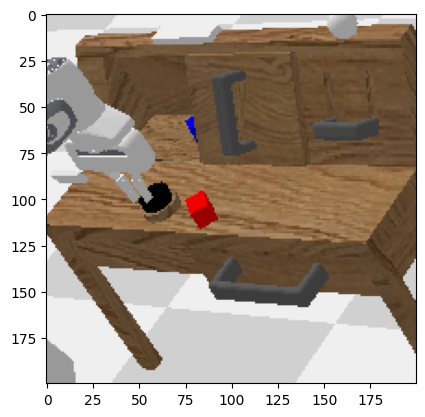

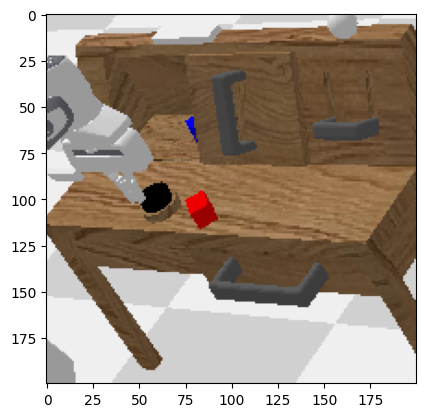

In [ ]:
import time
import hydra
import numpy as np
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from IPython import display

##Lets see simulation result using random control

env = hydra.utils.instantiate(cfg.env)
observation = env.reset()
for i in range(5):
  # The action consists in a pose displacement (position and orientation)
  action_displacement = np.random.uniform(low=-1, high=1, size=6)
  # And a binary gripper action, -1 for closing and 1 for oppening
  action_gripper = np.random.choice([-1, 1], size=1)
  action = np.concatenate((action_displacement, action_gripper), axis=-1)
  observation, reward, done, info = env.step(action)
  #The observation is given as a dictionary with different values
  rgb = env.render(mode="rgb_array")[:,:,:]#
  display.clear_output(wait=True)
  display.display(plt.gcf())
  plt.imshow(rgb)
  #cv2_imshow(rgb)

In [ ]:
##데이터셋 /calvinoffon/calvin_env/dataset/에 저장
## dataset 폴더 없으면 !mkdir /content/drive/MyDrive/calvinoffon/calvin_env/dataset
!pwd
%cd /content/drive/MyDrive/calvinoffon/calvin_env/dataset/calvin_debug_dataset/validation
!ls

In [ ]:
###각각의 npz 파일은 episode_{n}, n번째 step 정보를 나타냄
example = np.load('episode_0553962.npz')
for i in example.keys():
  print(i)
  print(example[i].shape)

In [ ]:
###Language Embeddings
lang_embeddings = np.load('lang_annotations/embeddings.npy',allow_pickle=True).item()
print("__________Language Instructions________")
for i in lang_embeddings.keys():
  print(i)

print(f"------Language Instruction : 'rotate_red_block_right-------")
for i in lang_embeddings['rotate_red_block_right'].keys():
  print(f'{i}')
  if(i == 'emb'):
    print(lang_embeddings['rotate_red_block_right'][i].shape)
  else:
    print(lang_embeddings['rotate_red_block_right'][i])


In [ ]:
###Language Annotations
lang_annotation_dicts = np.load('lang_annotations/auto_lang_ann.npy',allow_pickle=True).item()
print("----Annotation Dict Keys-----")
for i in lang_annotation_dicts.keys():
  print(f"__{i}___")
  for j in lang_annotation_dicts[i].keys():
    print(f"_____________{j}_____________")
    if(j == 'emb'):
      print(lang_annotation_dicts[i][j].shape)
    else:
       print(lang_annotation_dicts[i][j])

###Based on these, in the episode, there exist 8 tasks

In [ ]:
##Example Trajectory Of A Task
trajectory_lang_data = []

for i,task in enumerate(lang_annotation_dicts['language']['task']):
  embedding = lang_annotation_dicts['language']['emb'][i,:,:]
  traj_idx = lang_annotation_dicts['info']['indx'][i]
  trajectory_lang_data.append({'task':task,'emb':embedding,'traj_idx':traj_idx})

###Take First Trajectory
target_traj = trajectory_lang_data[0]
traj_obs = []
traj_gripper_obs = []
traj_init_obs = None
traj_actions = []
for i in range(target_traj['traj_idx'][0],target_traj['traj_idx'][1]):
  example = np.load(f'episode_0{i}.npz')
  ##Extract Only Visual Observation from .npz file
  if(i==target_traj['traj_idx'][0]):
    traj_init_obs = {'robot_obs':example['robot_obs'],'scene_obs':example['scene_obs']}
  traj_obs.append(example['rgb_static'])
  traj_gripper_obs.append(example['rgb_gripper'])
  traj_actions.append(example['rel_actions'])

In [ ]:
##Observe Dataset
import time
import hydra
import numpy as np
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from IPython import display

#print(f''target_traj['emb']')
for i,j in zip(traj_obs,traj_gripper_obs):
  display.clear_output(wait=True)
  display.display(plt.gcf())
  print(f"Target Trajectory - Task:{target_traj['task']}")
  print(f"Episode-IDs - {target_traj['traj_idx']}")
  plt.subplot(1,2,1)
  plt.imshow(i)
  plt.subplot(1,2,2)
  plt.imshow(j)

여기는 실시간 하는 법!

In [ ]:
##Control Using actions of the Offline Dataset
import time
import hydra
import numpy as np
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from IPython import display

##Lets see simulation result using random control

env = hydra.utils.instantiate(cfg.env)
observation = env.reset()
print(env.get_state_obs())

##데이터의 initial point로 configuration 바꾸기!!!
observation = env.reset(scene_obs=traj_init_obs['scene_obs'],robot_obs=traj_init_obs['robot_obs'])
print(env.get_state_obs())

WARNING uncommitted modified files: calvin_env/scripts/convert_gripper_actions.py,calvin_env/scripts/render_low_freq.py,data/franka_panda/meshes/visual/~$Assem1.SLDASM,data/franka_panda/meshes/visual/~$FRANKA_Finger.SLDPRT,data/franka_panda/meshes/visual/~$finger.SLDPRT,egl_check/build.sh,tacto
disconnecting id 3 from server{'robot_obs': array([ 0.02586889, -0.2313129 ,  0.5712808 ,  3.09045411, -0.02908596,
        1.50013585,  0.07999963, -1.21779124,  1.03987629,  2.11978254,
       -2.34205014, -0.87015899,  1.64119093,  0.55344929,  1.        ]), 'scene_obs': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.89120579e-20,
        0.00000000e+00,  0.00000000e+00,  9.93221827e-03, -1.35050261e-01,
        4.59980893e-01, -2.00969817e-03, -4.36011528e-04, -7.30874836e-01,
       -1.62979373e-01,  9.79775552e-02,  4.60019821e-01, -7.41180638e-03,
       -1.60898503e-03, -2.29274037e+00,  7.98394360e-02,  8.67275785e-02,
        4.59999343e-01, -6.05178858e-03, -1.52431147e-

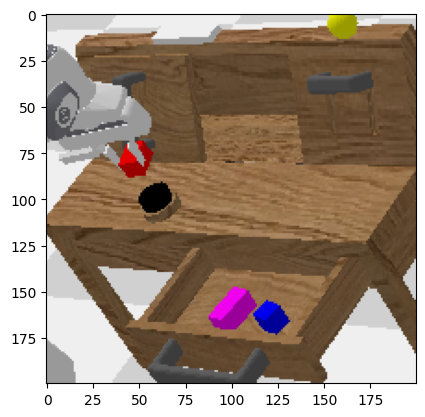

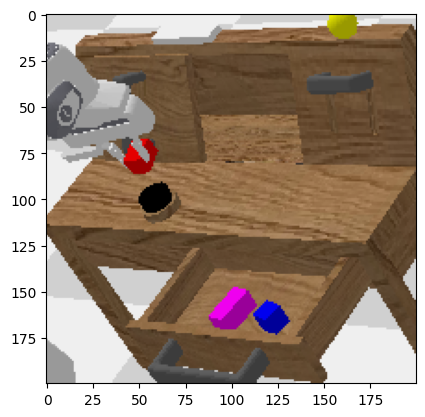

In [ ]:
observation = env.reset(scene_obs=traj_init_obs['scene_obs'],robot_obs=traj_init_obs['robot_obs'])
print(env.get_state_obs())

for action in traj_actions:
  # The action consists in a pose displacement (position and orientation)
  # NOTE : action_displacement = action[:6], action_gripper = action[-1]
  observation, reward, done, info = env.step(action)
  #The observation is given as a dictionary with different values
  rgb = env.render(mode="rgb_array")[:,:,:]#::-1
  display.clear_output(wait=True)
  display.display(plt.gcf())
  plt.imshow(rgb)
  #cv2_imshow(rgb)

##  Custom environment for Reinforcement Learning
There are some aspects that needs to be defined to be able to use it for reinforcement learning, including:

1.   Observation space
2.   Action space
3.   Reward function

We are going to create a Custom environment that extends the **PlaytableSimEnv** to add these requirements. <br/>
The specific task that will be solved is called "move_slider_left", here you can find a [list of possible tasks](https://github.com/mees/calvin_env/blob/main/conf/tasks/new_playtable_tasks.yaml) that can be evaluated using CALVIN.



In [ ]:
from gym import spaces
from calvin_env.envs.play_table_env import PlayTableSimEnv

class SlideEnv(PlayTableSimEnv):
    def __init__(self,
                 tasks: dict = {},
                 **kwargs):
        super(SlideEnv, self).__init__(**kwargs)
        # For this example we will modify the observation to
        # only retrieve the end effector pose
        self.action_space = spaces.Box(low=-1, high=1, shape=(7,))
        self.observation_space = spaces.Box(low=-1, high=1, shape=(7,))
        # We can use the task utility to know if the task was executed correctly
        self.tasks = hydra.utils.instantiate(tasks)

    def reset(self):
        obs = super().reset()
        self.start_info = self.get_info()
        return obs

    def get_obs(self):
        """Overwrite robot obs to only retrieve end effector position"""
        robot_obs, robot_info = self.robot.get_observation()
        return robot_obs[:7]

    def _success(self):
        """ Returns a boolean indicating if the task was performed correctly """
        current_info = self.get_info()
        task_filter = ["move_slider_left"]
        task_info = self.tasks.get_task_info_for_set(self.start_info, current_info, task_filter)
        return 'move_slider_left' in task_info

    def _reward(self):
        """ Returns the reward function that will be used
        for the RL algorithm """
        reward = int(self._success()) * 10
        r_info = {'reward': reward}
        return reward, r_info

    def _termination(self):
        """ Indicates if the robot has reached a terminal state """
        success = self._success()
        done = success
        d_info = {'success': success}
        return done, d_info

    def step(self, action):
            """ Performing a relative action in the environment
                input:
                    action: 7 tuple containing
                            Position x, y, z.
                            Angle in rad x, y, z.
                            Gripper action
                            each value in range (-1, 1)

                            OR
                            8 tuple containing
                            Relative Joint angles j1 - j7 (in rad)
                            Gripper action
                output:
                    observation, reward, done info
            """
            # Transform gripper action to discrete space
            env_action = action.copy()
            env_action[-1] = (int(action[-1] >= 0) * 2) - 1

            # for using actions in joint space
            if len(env_action) == 8:
                env_action = {"action": env_action, "type": "joint_rel"}

            self.robot.apply_action(env_action)
            for i in range(self.action_repeat):
                self.p.stepSimulation(physicsClientId=self.cid)
            obs = self.get_obs()
            info = self.get_info()
            reward, r_info = self._reward()
            done, d_info = self._termination()
            info.update(r_info)
            info.update(d_info)
            return obs, reward, done, info

In [ ]:
##Train Offline Using Soft Actor Critic Algorithm

In [ ]:
##Train With Soft Actor-Critic Algorithm
%cd /content/drive/MyDrive/calvinoffon
!git clone https://github.com/pranz24/pytorch-soft-actor-critic.git

/content/drive/MyDrive/calvinoffon
Cloning into 'pytorch-soft-actor-critic'...
remote: Enumerating objects: 566, done.
remote: Total 566 (delta 0), reused 0 (delta 0), pack-reused 566
Receiving objects: 100% (566/566), 1010.84 KiB | 4.45 MiB/s, done.
Resolving deltas: 100% (340/340), done.


# Training an RL agent
After generating the wrapper training a reinforcement learning agent is straightforward, for this example we will use stable baselines 3 agents

In [ ]:
###Train Online

!pip3 install stable_baselines3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 37.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-many

In [ ]:
##Train With Soft Actor-Critic Algorithm
%cd /content/drive/MyDrive/calvinoffon

To train the agent we create an instance of our new environment and send it to the stable baselines agent to learn a policy.


> Note: the example uses Soft Actor Critic (SAC) which is one of the state of the art algorithm for off-policy RL.



In [ ]:
import gym
import numpy as np
from stable_baselines3 import SAC
!pip install shimmy>=0.2.1

new_env_cfg = {**cfg.env}
new_env_cfg["tasks"] = cfg.tasks
new_env_cfg.pop('_target_', None)
new_env_cfg.pop('_recursive_', None)
env = SlideEnv(**new_env_cfg)
model = SAC("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000, log_interval=4)


WARNING uncommitted modified files: calvin_env/scripts/convert_gripper_actions.py,calvin_env/scripts/render_low_freq.py,data/franka_panda/meshes/visual/~$Assem1.SLDASM,data/franka_panda/meshes/visual/~$FRANKA_Finger.SLDPRT,data/franka_panda/meshes/visual/~$finger.SLDPRT,egl_check/build.sh,tacto
Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


disconnecting id 0 from server


KeyboardInterrupt: 

In [ ]:
##Language Qunatized Encoder
import torch
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim=None):
        super().__init__()
        if(hidden_dim is None):
          hidden_dim = lang_dim

        self.language_MLP = torch.nn.Sequential(
            torch.nn.Linear(lang_dim, hidden_dim),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_dim, hidden_dim)
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_dim, outpout_dim)
        )

        def forward(self, x):
          return self.language_MLP(x)

class State2QuatizedVecEncoder(nn.Module):
    def __init__(self, state_dim, hidden_dim,enc_dim):  #quantized_out_dim
        super().__init__()

        self.quantized_layer = nn.ModuleList(MLP(state_dim,hidden_dim,hidden_dim=384) for i in range(enc_dim))

    def forward(self, x):
        B,D = x.size()
        quantized_vec = []
        for i in self.quantized_layer:
            quantized_vec.append(i(x).unsqueeze(1))

        ###quantized_vec is now a len(enc_dim) list of (B,1,hidden_dim) neural_network

        return torch.cat(quantized_vec,dim=1) # (B,enc_dim,hidden_dim) output

class State_and_Language_Pair_Encoder(nn.Module):
    def __init__(self, state_dim, lang_dim, enc_dim, hidden_dim):
        super().__init__()

        self.language_encoder = MLP(lang_dim,hidden_dim)
        self.state_quantizer = StateQuantizedVecEncoder(state_dim,hidden_dim,enc_dim)

    def forward(self, state, lang_instructions):
        ##inputs state : (B,D), lang_structions : (B,L)

        lang_emb = self.language_encoder(lang_instructions) # (B,hidden_dim)
        quantized_vecs = self.state_quantizer(state)# (B,enc_dim,hidden_dim)

        cos_sim = torch.cosine_similarity(quantized_vecs,lang_emb,dim=-1) # (B,enc_dim)
        return cos_sim